<a href="https://colab.research.google.com/github/EdSang24/Moringa-Week-4-Core-IP/blob/main/Edward_Sang_Week_4_Core_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question

a) Specifying the question

The research question is to find out if the number of bluecars returned on the weekend is equal to the number of freed slots on the weekend.

b)Defining the Metric of Success

This analysis requires us identify periods and areas we are interested in doing research on via sampling.

We will implement the solution by performing an hypothesis test on the claim that we have made

c)Understanding the Context

The Autolib company provides the electric car sharing service to its clients. We are going to work as analysts to investigate the claim made on the research question.

We are going to perform a sampling on the interested areas and then we will perform an hypothesis testing on the claim to prove if it is true or false.

d)Recording the Experimental Design

In implementing the solution, I took the following steps;

*   Defining the question: Shows the context of the question at hand to help keep focus during the analysis
*   Reading the Data: Importing the data to help understand the observations and the variables
*  Checking the dataset: This is to acquire details on the dataset, i.e number of records, datatypes and other components.
*   Data Cleaning: Checking for outliers, missing values, anomalies and preparing the data for analysis.
*   Performing the Univariate, Bivariate and Multivariate analysis and recording the observations.
*  Implementing the solution by running the hypothesis testing.
*   Giving the conclusion and recommendation to the company from our analysis.


e)Data Relevance

The dataset contains information on three car types used by the company to provide the shared electric car services, that is the Blucars, Utilib and Utilib 14. It also has information on the usage of the cars locations, days and the charging slots provided by the company. This information is for the year 2018

# Importing Libaries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind

# Loading the dataset

In [ ]:
# loading the data
df = pd.read_csv('autolib_daily_events_postal_code.csv')

# Checking the dataset

In [ ]:
# checking the data types for each column

df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
# Determining the no. of records in our dataset

df.shape

(16085, 13)

In [ ]:
# Previewing the top of our dataset

df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Previewing the bottom of our dataset
 
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


# Tidying our Dataset

In [ ]:
# changing column names
df.columns=df.columns.str.lower().str.replace(' ','_')

# renaming column
df.rename(columns={'dayofweek':'day_of_week'}, inplace=True)
df.head()

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


Checking for outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


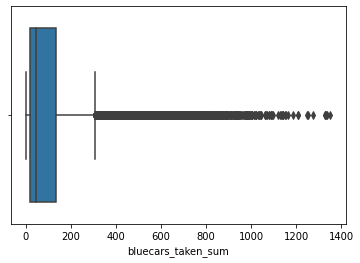

In [ ]:
sns.boxplot(df['bluecars_taken_sum'])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


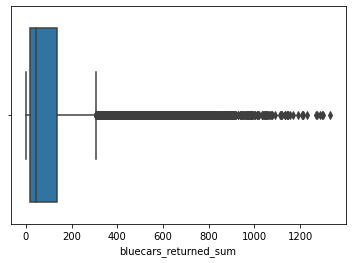

In [ ]:
sns.boxplot(df['bluecars_returned_sum'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


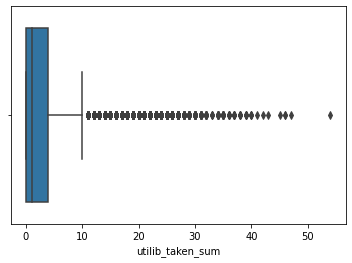

In [ ]:
sns.boxplot(df['utilib_taken_sum'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


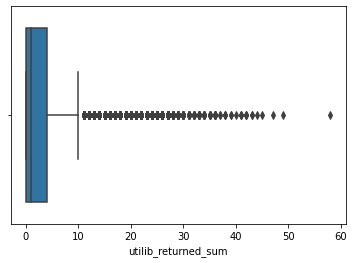

In [ ]:
sns.boxplot(df['utilib_returned_sum'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


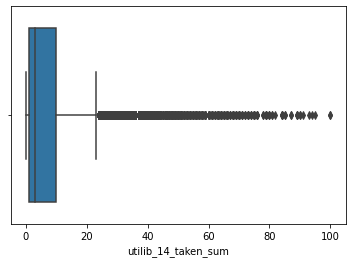

In [ ]:
sns.boxplot(df['utilib_14_taken_sum'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


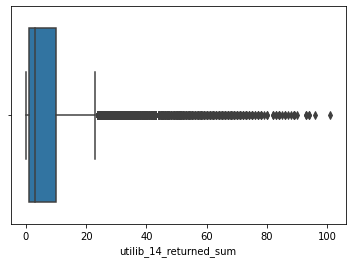

In [ ]:
sns.boxplot(df['utilib_14_returned_sum'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


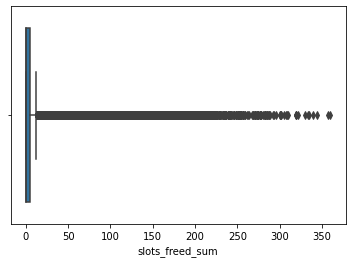

In [ ]:
sns.boxplot(df['slots_freed_sum'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


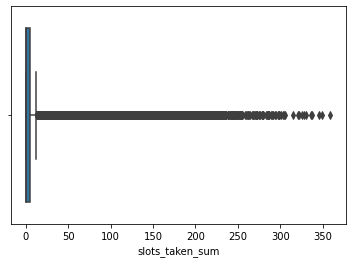

In [ ]:
sns.boxplot(df['slots_taken_sum'])
plt.show()

In [ ]:
# checking for missing values
df.isnull().sum()

postal_code               0
date                      0
n_daily_data_points       0
day_of_week               0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [ ]:
# checking for duplicates
df.duplicated().sum()

0

# UNIVARIATE ANALYSIS

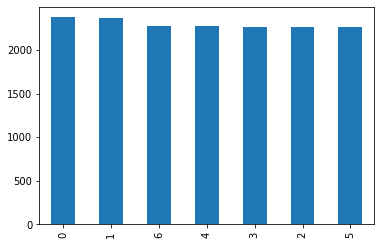

In [ ]:
# checking for the day of the week with highest bluecar activity
df['day_of_week'].value_counts().plot.bar()

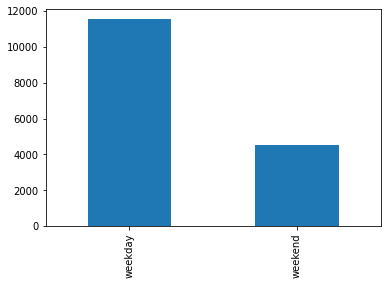

In [ ]:
# checking for bluecar activity during the weekdays and weekends
bluecars_taken=df[['day_type','bluecars_taken_sum']]
bluecars_taken['day_type'].value_counts().plot.bar()

Text(0.5, 1.0, 'Frequency of Bluecars taken')

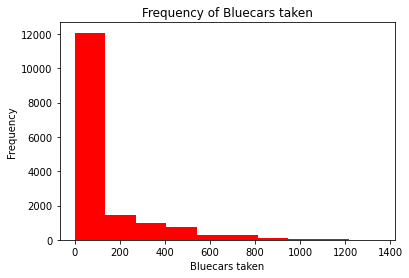

In [ ]:
# frequency in which bluecars are taken
plt.hist(df['bluecars_taken_sum'], color = 'red')

plt.xlabel('Bluecars taken')
plt.ylabel('Frequency')
plt.title('Frequency of Bluecars taken')

Text(0.5, 1.0, 'Frequency of Bluecars Returned')

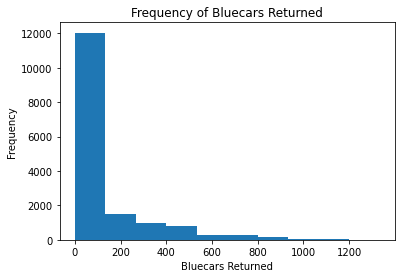

In [ ]:
# frequency in which bluecars are returned
plt.hist(df['bluecars_returned_sum'])

plt.xlabel('Bluecars Returned')
plt.ylabel('Frequency')
plt.title('Frequency of Bluecars Returned')

Text(0.5, 1.0, 'Frequency of Charging Slots Freed')

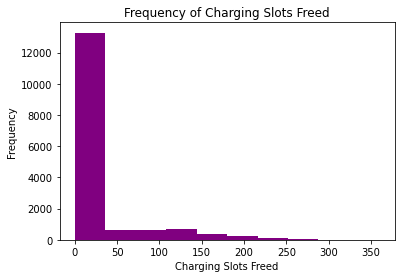

In [ ]:
# frequency of charging slots freed
plt.hist(df['slots_freed_sum'], color = 'purple')

plt.xlabel('Charging Slots Freed')
plt.ylabel('Frequency')
plt.title('Frequency of Charging Slots Freed')

Finding the mean

In [ ]:
# mean of bluecars taken
print(df['bluecars_taken_sum'].mean())

125.92695057506994


In [ ]:
# mean of bluecars returned
print(df['bluecars_returned_sum'].mean())

125.912713708424


In [ ]:
# mean of slots freed
print(df['slots_freed_sum'].mean())

22.62903326080199


Finding the median

In [ ]:
# median of bluecars taken
print(df['bluecars_taken_sum'].median())

46.0


In [ ]:
# median for bluecars returned
print(df['bluecars_returned_sum'].median())

46.0


In [ ]:
# median for slots freed
print(df['slots_freed_sum'].median())

0.0


Variance

In [ ]:
# variance for bluecars taken
print(df['bluecars_taken_sum'].var())

34383.01611333789


In [ ]:
# variance for bluecars returned
print(df['bluecars_returned_sum'].var())

34410.819413706275


In [ ]:
# variance for slots freed
print(df['slots_freed_sum'].var())

2716.52185037856


Standard Deviation

In [ ]:
# standard deviation for bluecars taken
print(df['bluecars_taken_sum'].std())

185.42657876727893


In [ ]:
# standard deviation for bluecars returned
print(df['bluecars_returned_sum'].std())

185.50153480148427


In [ ]:
# standard deviation for slots freed
print(df['slots_freed_sum'].std())

52.12026333757879


Skweness

In [ ]:
# skewness of bluecars taken
print(df['bluecars_taken_sum'].skew())

2.4063548974959086


In [ ]:
# skewness of bluecars returned
print(df['bluecars_returned_sum'].skew())

2.412084978838923


In [ ]:
# skewness of slots freed
print(df['slots_freed_sum'].skew())

2.5974057870090994


In [ ]:
print('all the columns are positively skewed')

all the columns are positively skewed


Kurtosis

In [ ]:
# Kurtosis of bluecars taken
print(df['bluecars_taken_sum'].kurt())

6.172692305510042


In [ ]:
# kurtosis of bluecars returned
print(df['bluecars_returned_sum'].kurt())

6.1862880957582345


In [ ]:
# kurtosis of slots freed
print(df['slots_freed_sum'].kurt())

6.454514382612528


# BIVARIATE ANALYSIS

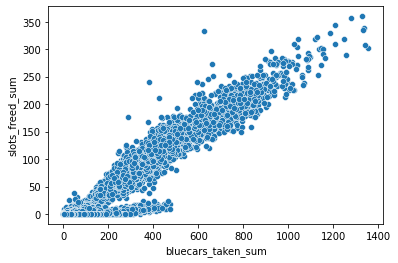

In [ ]:
# scatter plot showing realtion between blucars taken and slots freed
sns.scatterplot(x = 'bluecars_taken_sum', y = 'slots_freed_sum', data = df)

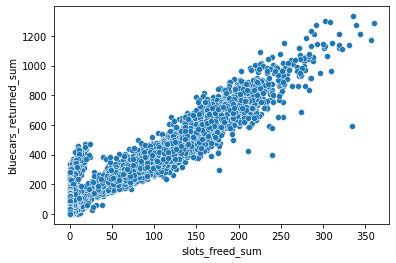

In [ ]:
# scatter plot showing the relation between slots freed and bluecars returned
sns.scatterplot(x = 'slots_freed_sum', y='bluecars_returned_sum', data = df)

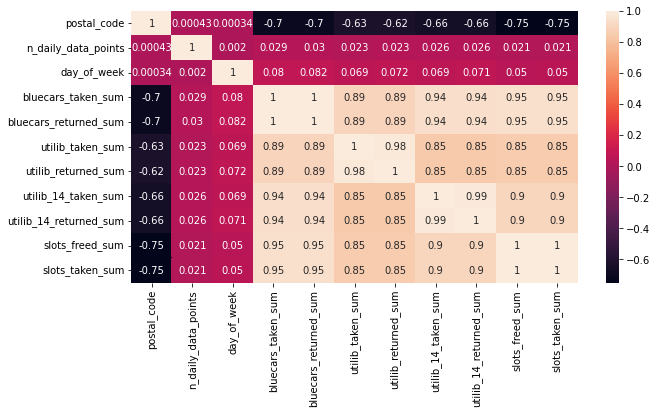

In [ ]:
# plotting a heatmap
fig, axes = plt.subplots(figsize= [10,5])
sns.heatmap(df.corr(),annot=True)
plt.show()

# HYPOTHESIS TESTING

Null hypothesis: The number of bluecars returned equals the number of freed slots on the weekend

Alternarive hypothesis: The number of bluecars returned is not equal to the number of freed slots on the weekend

In [ ]:
# defining the population
population = df[['day_type', 'bluecars_returned_sum','slots_freed_sum']]
population_df = population.loc[population['day_type']=='weekend']
population_df.head()

,day_type,bluecars_returned_sum,slots_freed_sum
5,weekend,185,38
6,weekend,180,34
12,weekend,223,38
13,weekend,193,22
19,weekend,217,41


In [ ]:
# slecting a sample
import random
sample_returned = population_df['bluecars_returned_sum'].sample(n = 20,random_state=1)
sample_slots_freed = population_df['slots_freed_sum'].sample(n = 20,random_state=1)

In [ ]:
# calculating the p-value ttest
statistic, pvalue = ttest_ind(sample_returned, sample_slots_freed, equal_var=True)

In [ ]:
# printing p-value and statistic
print("p-value of the test = ",pvalue)
print("Statistic = ",statistic)
print("_" * 50)

# the p-value is too low thus meaning the number of bluecars returned isn't equal to the freed slots during the weekend

p-value of the test =  0.026769979911133234
Statistic =  2.30422715245806
__________________________________________________


In [ ]:
# means of the 2 samples
print(sample_returned.mean())
print(sample_slots_freed.mean())

124.65
24.05
